In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[1]

'olivia'

In [4]:
words[:3]

['emma', 'olivia', 'ava']

In [5]:
# create dict b
# add them with s and e
# in b key is tuple of biagram and value count
# initiate with 0 or increase one

In [6]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

len(b)

627

In [7]:
b = {}

for w in words[:2]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1)

<S>
e
m
m
a
<S>
o
l
i
v
i
a


In [9]:
sorted(b.items(), key= lambda kv: -kv[1])

[]

In [11]:
import torch

In [12]:
N = torch.zeros((27,27), dtype=torch.int32)

In [13]:
# create sorted list of set of all chars as chars
# stoi: map str to int
# add s and e to end 

In [14]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [15]:
# chs where word is sworde
# ch1, ch2 in words 
# ix1 ix2 in stoi ch1 ch2:
# add one count in the row,col

In [16]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline


(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

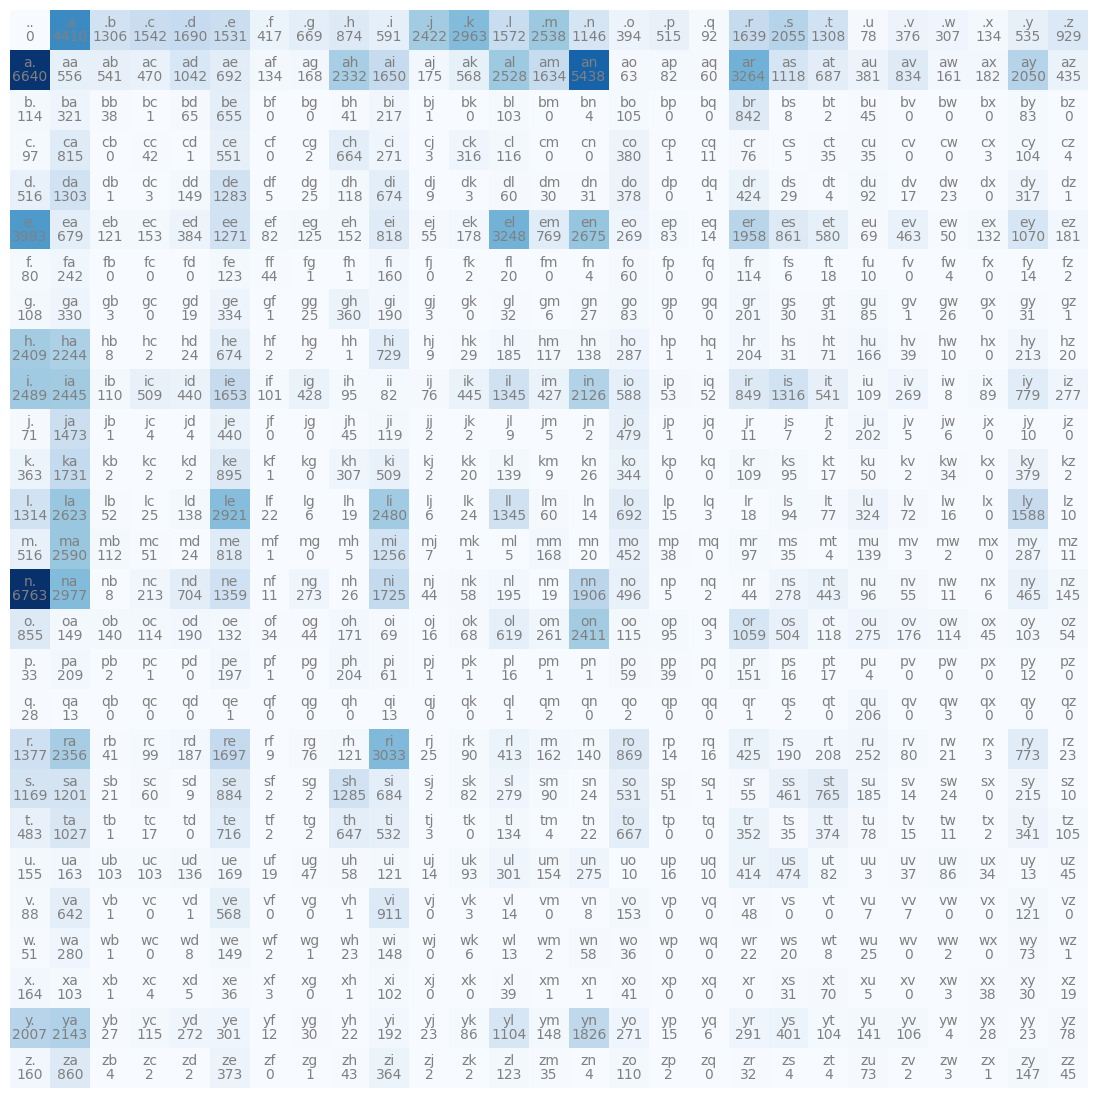

In [18]:

plt.figure(figsize=(14,14))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i,j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [19]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [20]:
P = (N+1).float()
P /= P.sum(1,keepdim=True)
P[0].sum()

tensor(1.)

In [54]:

g = torch.Generator().manual_seed(71)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])        
        if ix == 0:
            break
    print(''.join(out))
        

caronawalonaei.
wsh.
javeller.
lavefadent.
jan.
ae.
elaistoh.
aelaka.
gh.
jeraylerentah.


In [22]:
# GOAl: maximise likelihood of the data w.r.t model parameters (statistical modelling)
# equivalent to maximising the log likelihood (because log is monotic)
# equivalent to minimizing the negative log likelyhood
# equivalent to mininizing the average log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [53]:
log_likelihood = 0.0
n = 0

#for w in words:
for w in ['kiran']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f'{ch1}{ch2}:{prob:.4f} {logprob:.4f}')

print(f'{log_likelihood = }')
nll = -log_likelihood
print(f'{nll = }')
print(f'{nll/n}')

log_likelihood = tensor(-12.2296)
nll = tensor(12.2296)
2.038261651992798


In [55]:
# create the training set of all the bigrams (x,y)
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


In [56]:
xs

tensor([ 0,  5, 13,  ..., 25, 26, 24])

In [26]:
ys

tensor([ 5, 13, 13,  1,  0])

In [27]:
import torch.nn.functional as F

In [58]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc.shape

torch.Size([228146, 27])

In [29]:
xenc.shape

torch.Size([5, 27])

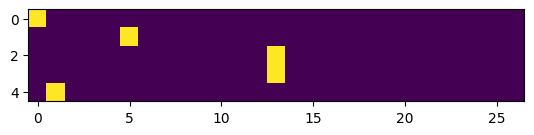

In [30]:
plt.imshow(xenc)

In [31]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [32]:
W = torch.randn((27,27))
xenc @ W


tensor([[-1.6551, -0.9136,  0.5838,  0.8980,  0.7205,  0.0839,  0.7554, -0.8586,
         -0.4012,  2.6916,  0.4331, -1.8751,  2.1588, -1.0493, -0.3152,  1.8626,
         -1.2348, -0.2575,  0.8389, -2.0169, -1.4255,  1.2394, -0.5788,  0.2515,
         -1.0351,  0.4716, -0.3149],
        [ 0.4989, -0.3539,  1.3975,  0.7838, -0.1757, -3.0026,  0.5751, -1.7552,
          0.8980,  1.0802, -0.1512, -1.5865, -2.0914,  1.2808, -0.1549, -0.3381,
         -0.0753,  0.5347, -0.8821, -0.6261,  1.0097,  0.5802,  1.6714, -0.1584,
         -1.0818, -0.2937,  1.0021],
        [-1.3689, -0.3481, -0.3687,  0.9805,  0.0998,  0.5165, -0.7866, -1.0578,
         -0.0684, -1.0450, -0.0031,  0.9903,  0.1161, -0.3591,  0.1401, -0.3108,
         -0.4438, -0.5878,  0.2454, -0.6155,  2.0112, -1.0379,  0.1500,  0.8555,
          0.0910,  1.2443,  0.6762],
        [-1.3689, -0.3481, -0.3687,  0.9805,  0.0998,  0.5165, -0.7866, -1.0578,
         -0.0684, -1.0450, -0.0031,  0.9903,  0.1161, -0.3591,  0.1401, -0.3108

In [33]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0034, 0.0072, 0.0323, 0.0442, 0.0370, 0.0196, 0.0383, 0.0076, 0.0120,
         0.2655, 0.0277, 0.0028, 0.1558, 0.0063, 0.0131, 0.1159, 0.0052, 0.0139,
         0.0416, 0.0024, 0.0043, 0.0621, 0.0101, 0.0231, 0.0064, 0.0288, 0.0131],
        [0.0399, 0.0170, 0.0980, 0.0531, 0.0203, 0.0012, 0.0431, 0.0042, 0.0595,
         0.0714, 0.0208, 0.0050, 0.0030, 0.0872, 0.0208, 0.0173, 0.0225, 0.0414,
         0.0100, 0.0130, 0.0665, 0.0433, 0.1289, 0.0207, 0.0082, 0.0181, 0.0660],
        [0.0068, 0.0188, 0.0185, 0.0711, 0.0295, 0.0447, 0.0122, 0.0093, 0.0249,
         0.0094, 0.0266, 0.0718, 0.0300, 0.0186, 0.0307, 0.0196, 0.0171, 0.0148,
         0.0341, 0.0144, 0.1994, 0.0095, 0.0310, 0.0628, 0.0292, 0.0926, 0.0525],
        [0.0068, 0.0188, 0.0185, 0.0711, 0.0295, 0.0447, 0.0122, 0.0093, 0.0249,
         0.0094, 0.0266, 0.0718, 0.0300, 0.0186, 0.0307, 0.0196, 0.0171, 0.0148,
         0.0341, 0.0144, 0.1994, 0.0095, 0.0310, 0.0628, 0.0292, 0.0926, 0.0525],
        [0.0400, 0.0043,

In [34]:
probs[2].sum()

tensor(1.)

In [35]:
# SUMMARY ------------------>>>>

In [36]:
xs,ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [37]:
# randomly initialise 27 neurons' weights. each neuron recieves 27 inputs

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g)

In [38]:
xenc = F.one_hot(xs, num_classes=27).float()    # input: one-hot encoding
logits = xenc @ W     # predict log counts

# softmax
counts = logits.exp()   # counts, equivalent to N
prob = counts / counts.sum(1, keepdims=True)  # probabities for next charecter

In [60]:
logits.shape

torch.Size([5, 27])

In [40]:
nlls = torch.zeros(5)

for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input chr index
    y = ys[i].item() # label chr index
    print('__________'*7)
    
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indices{x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next charecter):', y)
    
    p = probs[i, y]
    
    print('probability assigned by the net to the correct charecter:', p.item())
    logp = torch.log(p)
    print('log likelihood', nll.item())
    
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('________'*8)
print('________'*8)

print('average negative log likelihood, i.e. loss =', nlls.mean().item())

______________________________________________________________________
bigram example 1: .e (indices0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0034, 0.0072, 0.0323, 0.0442, 0.0370, 0.0196, 0.0383, 0.0076, 0.0120,
        0.2655, 0.0277, 0.0028, 0.1558, 0.0063, 0.0131, 0.1159, 0.0052, 0.0139,
        0.0416, 0.0024, 0.0043, 0.0621, 0.0101, 0.0231, 0.0064, 0.0288, 0.0131])
label (actual next charecter): 5
probability assigned by the net to the correct charecter: 0.019569508731365204
log likelihood 27.867216110229492
negative log likelihood: 3.9337825775146484
______________________________________________________________________
bigram example 2: em (indices5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0399, 0.0170, 0.0980, 0.0531, 0.0203, 0.0012, 0.0431, 0.0042, 0.0595,
        0.0714, 0.0208, 0.0050, 0.0030, 0.0872, 0.0208, 0.0173, 0.0225, 0.0414,
        0.0100, 0.0130, 0.0665, 0.0433, 0.1289, 0.0207, 0.00

In [41]:
# randomly initialise 27 neurons' weights. each neuron recieves 27 inputs

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [41]:
# forward pass

xenc = F.one_hot(xs, num_classes=27).float()    # input: one-hot encoding
logits = xenc @ W     # predict log counts

# softmax
counts = logits.exp()   # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)  # probabities for next charecter
loss = -probs[torch.arange(5), ys].log().mean()

In [42]:
print(loss.item())

3.7693049907684326


In [43]:
# backward pass

W.grad = None   # set to zero grad
loss.backward()

In [44]:
W.data += -0.1 * W.grad

In [45]:
# optimization

In [46]:
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        #print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples:', num)

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

number of examples: 228146


In [ ]:
for k in range(100):

    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float()   
    logits = xenc @ W     
    counts = logits.exp() 
    probs = counts / counts.sum(1, keepdims=True)  
    loss = -probs[torch.arange(num), ys].log().mean() +0.01 * (W**2).mean()
    print(loss.item())

    # backward pass
    W.grad = None  
    loss.backward()

    # update
    W.data += -50 * W.grad
    

In [50]:
g = torch.Generator().manual_seed(171)

for i in range(5):

    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()   
        logits = xenc @ W     
        counts = logits.exp() 
        p = counts / counts.sum(1, keepdims=True)  

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0: 
            break

    print(''.join(out))

coe.
amailan.
eliazlona.
zas.
beriuna.
